In [ ]:
!pip3 install algoliasearch

In [ ]:
import pandas as pd
import algoliasearch.search_client
from getpass import getpass
import json

In [ ]:
app_id = getpass('Enter the app_id value: ')
api_key = getpass('Enter the api_key value: ')

Enter the app_id value: ··········
Enter the api_key value: ··········


In [ ]:
# Initialize Algolia search client
client = algoliasearch.search_client.SearchClient.create(
        app_id, api_key)
index = client.init_index("asknature_searchable_posts")

In [ ]:
'''asknature_response = index.search(
        "filters: post_type_label:'Biological%20Strategies'")['hits']
for i in asknature_response:
  print(i)
  #raise NotImplementedError'''

res = index.browse_objects({'query': "", 'attributesToRetrieve': ['summary']})

In [ ]:
summaries = []
summaries_dict = {}
ids = []
x = 0
for i in res:
  i["objectID"]
  x += 1
  summ = i["summary"]
  # print(i)
  if summ not in summaries:
    ids.append(i["objectID"])
    summaries.append(summ)
print(x)
print(len(summaries))

raw_summaries = summaries[1:]
summaries = summaries[1:]
print(summaries[0])

2242
2099
Wind turbines from Paris-Sorbonne University are flexible to reduce drag and create a more powerful stroke.



In [ ]:
'''from google.colab import drive
drive.mount("/content/gdrive")

with open("gdrive/MyDrive/NASA/Clustering_Experiments/summaries.json", "w") as outfile:
    # json.dump({"summaries": summaries}, outfile)
    summaries = json.loads(outfile)['summaries']'''

'from google.colab import drive\ndrive.mount("/content/gdrive")\n\nwith open("gdrive/MyDrive/NASA/Clustering_Experiments/summaries.json", "w") as outfile:\n    # json.dump({"summaries": summaries}, outfile)\n    summaries = json.loads(outfile)[\'summaries\']'

In [ ]:
import nltk
nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /Users/eshan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else
# Then lowercase everything 

# Don't remove stop words or lemmatize yet!
# Don't remove digits yet!

tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(summaries)):
  summaries[i] = tokenizer.tokenize(str(summaries[i]))
  summaries[i]  =  " ".join([word.lower() for word in summaries[i]])

'''summaries = summaries[1:]
nltk.pos_tag(summaries[1])'''
print(summaries[-1])

halobacteria produce chemical energy by capturing light energy with rhodopsin pigments and using it to pump protons out of the cell setting up a proton gradient used to generate atp


In [ ]:
# check for duplicates
len(summaries) != len(set(summaries))
### there are duplicates

True

In [ ]:
summaries = list(set(summaries))
len(summaries)

2097

## Let's start with discrete document representation.
- TF-IDF for document representation
  - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X = vectorizer.fit_transform(summaries).toarray()
print(X.shape)
print(vectorizer.get_feature_names_out())

(2097, 64119)
['000' '000 beats' '000 beats per' ... 'µlot' 'µlot platform'
 'µlot platform technology']


In [ ]:
!pip3 install kneed

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Silhouette Analysis - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# How to find elbow in Scree Plot - https://stackoverflow.com/questions/51762514/find-the-elbow-point-on-an-optimization-curve-with-python


In [ ]:
K_params = [i + 1 for i in range(50)]

within_cluster_variation = []
between_cluster_variation = []
CH_index = []

for k in K_params:
    kmeans = KMeans(n_clusters=k, random_state=50, n_init=20).fit(X)
    within_cluster_variation.append(kmeans.inertia_)
    print(k, kmeans.inertia_)
    '''if len(within_cluster_variation) >= 2:
      kn = KneeLocator(K_params[:k], within_cluster_variation, curve='convex', direction='decreasing')
      opt_k = kn.knee
      print("Num Clusters: ", k)
      print("Knee: ",opt_k)
    '''
    labels = kmeans.labels_
    if k != 1:
        between_cluster_variation.append(davies_bouldin_score(X, labels))
        CH_index.append(calinski_harabasz_score(X, labels))

# Monte Carlo Simulation

In [ ]:
K_params = [i + 1 for i in range(50)]

json_dict_clustering_results = {}

for i in K_params:
  within_cluster_variation = []
  between_cluster_variation = []
  CH_index = []
  print(i)
  for k in K_params:
      kmeans = KMeans(n_clusters=k, random_state=i, n_init=30).fit(X)
      within_cluster_variation.append(kmeans.inertia_)
      labels = kmeans.labels_
      if k != 1:
          between_cluster_variation.append(davies_bouldin_score(X, labels))
          CH_index.append(calinski_harabasz_score(X, labels))

  json_dict_clustering_results[i] = {"BCV": between_cluster_variation, 
                                     "WCV": within_cluster_variation,
                                     "CH": CH_index}
      

In [ ]:
json_dict_clustering_results.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
import json
'''with open('clustering_results.json', 'w') as fp:
    json.dump(json_dict_clustering_results, fp)'''
with open('clustering_results.json', 'r') as fp:
  x = json.load(fp)

In [ ]:
x["2"]

{'BCV': [28.426571159975214,
  25.871347472131408,
  23.986873068853694,
  22.027406553874506,
  20.633866852229932,
  19.336994595481404,
  18.618554992789377,
  17.869088110758256,
  17.262458530719037,
  16.733331457266,
  15.747721267624152,
  15.417939449085948,
  14.862363268639584,
  14.682896375384646,
  14.158172602539064,
  14.28463925977782,
  13.711504604431475,
  13.38180317388486,
  13.37974663473915,
  12.63301191577498,
  12.81726521007684,
  12.028588944577974,
  12.427580260455835,
  11.965332763048645,
  11.595685404677257,
  11.516885585282326,
  11.501127648857892,
  11.316192713255752,
  11.363813932477687,
  10.748520953351102,
  10.469014829514732,
  11.2257427403551,
  10.466261763573852,
  10.249800365268028,
  10.1487141028949,
  10.07298738671566,
  9.645269328038527,
  9.873939461789343,
  9.63133652854866,
  9.808424230096676,
  9.566258619502381,
  9.020743619449389,
  9.027149896574313,
  9.402564822854035,
  9.262869238450785,
  9.148009401329771,
  8.8

In [ ]:
x = [0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]
y = [-5.0, 0.263, 1.897, 2.692, 3.163, 3.475, 3.696, 3.861, 3.989, 4.091]
kneedle = KneeLocator(x, y, S=1.0, curve="concave", direction="increasing")

print(round(kneedle.knee, 3))

print(round(kneedle.elbow, 3))

0.222
0.222


# Within-cluster variation 


*   measure the amount by which the observations within each cluster 
*   differ from each other. 
*   The lower it is, the better.


<br>

> $minimize_{C_1,...,C_k} = {\sum^K_{k=1}WCV(C_k)}$

> $WCV(C_k) = \frac{1}{|C_k|}\sum_{i,i' \in C_k} \sum^p_{j=1}(x_{ij} - x_{i'_j})^2$

> $|C_k|$ denotes the number of observations in the kth cluster. 

> $\sum_{i,i' \in C_k} \sum^p_{j=1}(x_{ij} - x_{i'j})^2$ denotes the euclidean distance of all pairs in the cluster.

<br>


* Putting it all together, split the observations into K clusters such that the total WCV is as small as possible.
* However, the WCV will always decrease as the number of clusters increase. This is because there are less observations in the cluster, thereby making the cluster smaller and the observations in the cluster closer together. 

* So, we must make a tradeoff and choose an "elbow/knee" on the plot. This is known as a Scree plot.

* The elbow is a k, where drops in WCV(k) are not very significant after k increases.

In [ ]:
kn = KneeLocator(K_params, within_cluster_variation, curve='convex', direction='decreasing')
opt_k = kn.knee
print(opt_k)
if opt_k == None:
  opt_k = 50

None


/Users/eshan/miniforge3/envs/env_tf/lib/python3.9/site-packages/kneed/knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


In [ ]:
within_cluster_variation[49]

2017.4621758444443

random_state = 1 ==> 2021.01, opt_k = 46

random_state = 1 ==> 2017.91, opt_k = None

<br>

When the random_state is set and n_init is set, the results are reproducible

random_state = 1, n_init = 50 ==> 2017.59, opt_k  = None

random_state = 1, n_init = 50 ==> 2017.59, opt_k  = None

random_state = 0, n_init = 50 ==> 2017.67, opt_k = None

random_state = 50, n_init = 50 ==> 2017.31, opt_k = None

random_state = 50, n_init = 30 ==> 2017.46, opt_k = None


### Optimal number of clusters is 42. 

In [ ]:
import matplotlib.pyplot as plt

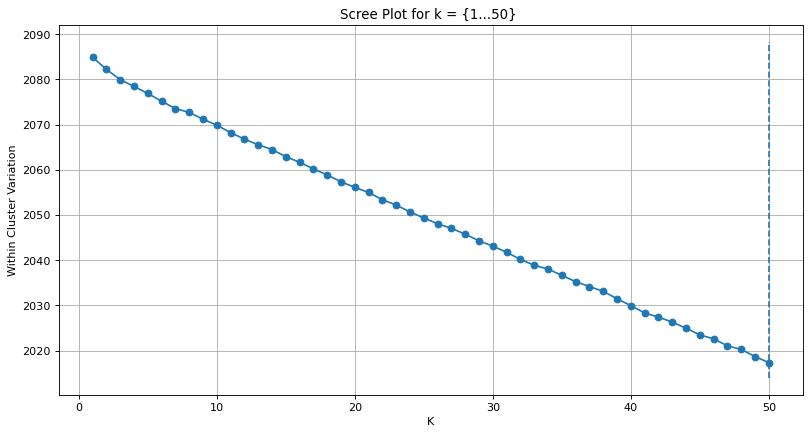

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(K_params,within_cluster_variation, marker='o')
plt.title('Scree Plot for k = {1...50} ')
plt.xlabel('K')
plt.ylabel('Within Cluster Variation')
plt.grid(True)
plt.vlines(opt_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

# Silhouette Analysis
*   graph representation of how well each observation lies within its cluster.

### $a_i$
*  For each sample x_i, let a_i be the average distance between x_i and all other data within the same cluster.
* a_i can be interpreted as a measure of how well x_i is assigned to its cluster. 
* the smaller the value, the better it fits its cluster. 

### $b_i$
*  This is the lowest average distance of x_i to all points in any other cluster, which x_i is not a member of. 
* This is the neighboring cluster, or cluster closest to data point x_i. It is the next best fit cluster. 


### $s_i$

$s_i = \frac{b_i - a_i}{max(a_i, b_i)}$

* if a_i < b_i, s_i is positive, meaning it is a good fit to it's cluster.
* if a_i == b_i, it could belong to its cluster or the neighboring cluster. 
* if a_i > b_i, x_i belongs to it's neigboring cluster.

* Therefore, s_i closer to 1 means its appropriately clustered, and the average s_i over a cluster measure how tightly grouped the data is in the cluster. 

* We want a higher average.

### Etc

* If there are too many or too few clusters, some of the clusters will display narrower silhouettes. 
* We also don't want a lot of negative silhouette scores.




In [ ]:
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
# Silhouette Analysis - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
opt_avg_silhouette_score = float("-inf")
opt_k_silhouette = 0
opt_cluster_labels = []

for k in K_params[1:]:
    print(k)
    clusterer = KMeans(n_clusters=k, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)

    if silhouette_avg > opt_avg_silhouette_score:
      opt_avg_silhouette_score = silhouette_avg
      opt_k_silhouette = k
      opt_cluster_labels = cluster_labels
    

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 7)

#ax1.set_xlim([-0.1, 1])

#ax1.set_ylim([0, len(X) + (k + 1) * 10])

print(
      "Optimal num_clusters =",
      opt_k_silhouette,
      "Optimal average silhouette_score is :",
      opt_avg_silhouette_score,
  )

print()

sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10

for i in range(opt_k_silhouette):
      
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / opt_k_silhouette)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.01, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10 

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")


ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([]) 
#ax1.set_xticks([-0.001, 0, 0.002, 0.004, 0.006, 0.008, .01])


colors = cm.nipy_spectral(cluster_labels.astype(float) / opt_k_silhouette)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


centers = clusterer.cluster_centers_

ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

#ax2.set_xlim([-0.00001, 0.00001])

#ax2.set_ylim([-0.0001, 0.0001])

#ax2.set_xticks([-0.001, 0, 0.002, 0.004, 0.006, 0.008, .01])

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % opt_k_silhouette,
    fontsize=14,
    fontweight="bold",
)

plt.show()

### It looks as though the silhouette plots are poor. There are too many clusters indicated by the fact that the silhouettes are narrow. Additionally there a large amount of negative values.

### However, the scree plot method and silhouette plot method yielded a similar number of optimal clusters. 

### We probably have to try different document representation later. 

### I will choose k = 42, received from the scree plots


# Let's check the data in each cluster.

In [ ]:
opt_k

In [ ]:
# number of samples that are not 0
len(np.nonzero(X)[0])

In [ ]:
km = KMeans(n_clusters=opt_k).fit(X)
print(km.labels_)

In [ ]:
len(km.labels_) == len(summaries)

In [ ]:
result_df = pd.DataFrame()
for i in range(len(summaries)):
  result_df = pd.concat([result_df, 
                                pd.DataFrame.from_records([{
                                    "Summary": summaries[i], 
                                    "Cluster": km.labels_[i],  
                                }])], ignore_index=True)

In [ ]:
not result_df["Summary"].is_unique 

In [ ]:
result_df

In [ ]:
print(result_df.loc[8, "Summary"])
print(result_df.loc[9, "Summary"])
print()

In [ ]:
result_df.loc[result_df['Cluster'] == 5][:5]

In [ ]:
print(result_df.loc[17, "Summary"])
print(result_df.loc[121, "Summary"])

In [ ]:
result_df.loc[result_df['Cluster'] == 0].index

In [ ]:
X_samples_0_cluster = X[result_df.loc[result_df['Cluster'] == 0].index]
avg_num_samples = []
for k in range(opt_k):
  avg_num_samples.append(len(result_df.loc[result_df['Cluster'] == k].index))

### around 49 samples per cluster
print(sum(avg_num_samples)/opt_k)

In [ ]:
km.cluster_centers_

In [ ]:
for k in range(opt_k):
  d = km.transform(X)[:, k]
  ind = np.argsort(d)[::][:10]
  print(ind)
  for i in ind:
    print(summaries[i])
  #raise NotImplementedError
  print()
  print()

In [ ]:
import gensim

In [ ]:
summaries = raw_summaries[1:]

In [ ]:
# Convert a document into a list of tokens.
# This lowercases, tokenizes, de-accents (optional). – the output are final tokens 
# = unicode strings, that won’t be processed any further.
summaries = [gensim.utils.simple_preprocess(i) for i in summaries]

# cross-validation for window_size?
# window --> how many words before and after target word to be considered
# min_count --> how many words should be in a sentence to consider it trainable
# workers --> # threads
model = gensim.models.Word2Vec(
    window = 3,
    min_count = 2,
    workers=4
)

# build the vocab
model.build_vocab(summaries, progress_per=200)

In [ ]:
print(model.epochs)
model.corpus_count

In [ ]:
model.train(summaries, total_examples=model.corpus_count, epochs = model.epochs)

In [ ]:
# save this model after connecting to hosted runtime
# model.save()

In [ ]:
# remove stop words
model.wv.most_similar("leaf")

In [ ]:
print(model.wv.similarity(w1="wind", w2="rain"))
print(model.wv.similarity(w1="protect", w2="stabilize"))